<a href="https://colab.research.google.com/github/maviverosp/PUC-Rio/blob/main/Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00


In [ ]:
#Bibliotecas que utilizaremos

import random
import numpy
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

##Preparación para oprtimización
1. Función Objetivo
2. Var. de decición
3. Operadores

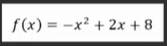

In [ ]:
#Función

def objective_function(individual):
  x = individual[0]
  return (-x**2 + 2*x + 8), #La coma o virgula tiene un uso especial que, porque retornara una tupla,
  #y esto e suna forma de permitir que la fun. objt, pueda retornar mas de un valor


In [ ]:
#Creador de individuo, y que taela. SI el es bueno o el malo.

creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #función objetivo: nome, (tipo(f.o.), peso de cada objetivo (no caso so um objetivo))
creator.create("Individual", list, fitness=creator.FitnessMax) #individuos

URL com todas as informaçoes sobre a biblioteca:
https://deap.readthedocs.io/en/master/api/tools.html


In [ ]:
toolbox = base.Toolbox()
# Generador de atributos inteiros:  nome, tipo de variaveis, intervalo (limite inf. lim. superior.)
toolbox.register("generador_nums", random.uniform, a=-1000, b=1000)
#"Registro una caja de herramientas" que tiene nombre de generador_nums, que hará la función de random.unifor, y especificamos el rango.
#Iniciador de individuos e populaçao
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.generador_nums, n=1) # 1: numero de variaveis de decisao
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                        # lista de individuos
toolbox.register("evaluate", objective_function)                                                  # funçao objetivos

In [ ]:
# Inicializador de operadores
toolbox.register("mate", tools.cxMessyOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selRoulette)

In [ ]:
random.seed(0)
numpy.random.seed(0)

In [ ]:
pop = toolbox.population(n=500) # tamanho da populaçao inicialización del pop
hof = tools.HallOfFame(1) # melhor individuo
stats = tools.Statistics(lambda ind: ind.fitness.values) #estatisticas que todos quiero visualizar dentro de la optimización
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)


In [ ]:
pop[0] #no es función de avaliacao, es x

[-890.4654995540791]

Optimización

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.0, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std   	min         	max    
0  	500   	-339116	302913	-1.00052e+06	4.07256
1  	104   	4.02486	0.827432	-2.86639    	8.47779
2  	107   	4.0713 	1.58406 	-16.0542    	8.99734
3  	106   	4.34513	1.62125 	-10.8104    	8.99734
4  	103   	4.81593	1.95145 	-10.5596    	8.99972
5  	95    	5.51342	2.22094 	-8.38288    	8.99972
6  	91    	6.49444	2.26258 	-3.01916    	8.99734
7  	101   	7.06298	2.13318 	0.126262    	8.99734
8  	94    	7.8231 	1.71936 	1.48753     	8.99734
9  	91    	8.15218	1.45758 	-1.3333     	8.99999
10 	106   	8.43166	1.12388 	-1.38428    	8.99999
11 	109   	8.56018	0.739613	4.07256     	8.99997
12 	103   	8.5772 	0.753271	4.07256     	8.99997
13 	99    	8.567  	0.708221	3.51829     	8.99997
14 	97    	8.6554 	0.627678	3.42651     	8.99997
15 	101   	8.63043	0.736344	2.36306     	8.99899
16 	95    	8.65295	0.649648	2.00575     	8.99899
17 	98    	8.64369	0.720308	-0.461981   	9      
18 	108   	8.67472	0.626493	2.94423     	8.99899
19 	112   	8.61023	0.851

Resultado

In [ ]:
# 5 Soluçoes da ultima geraçao
import pandas as pd
pd.DataFrame(pop).head(5)

,0
0,0.744841
1,1.051531
2,0.667902
3,1.124136
4,1.249265


In [ ]:
#Melhor solucáo
print("Melhor Individuo:")
print(hof[0])

#Melhor resultadp da funcáo objetivo
print("Melhor Resultado da:")
print(objective_function(hof[0]))


Melhor Individuo:
[1.001885353568245]
Melhor Resultado da:
(8.999996445441923,)


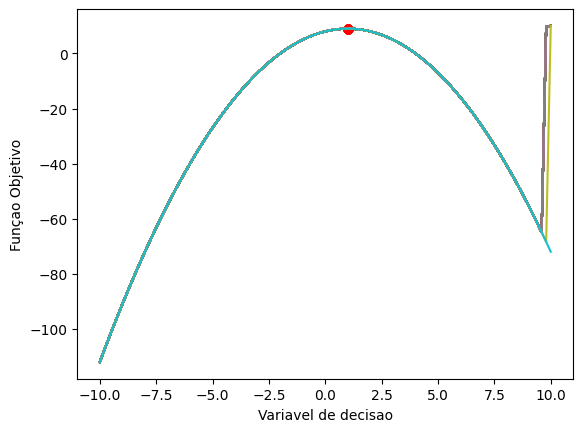

In [ ]:
# Vamos a dar una olhada na funçao

import matplotlib.pyplot as plt
x = numpy.linspace(-10,10,100) #100 pontos enre -10 e 10
y = numpy.empty(len(x))
for i in range(len(x)):
  y[i] = objective_function([x[i]])[0]
  plt.plot(x,y); #Variavel de decisáo vs funcáo objetivo
  plt.scatter(hof, objective_function(hof[0]), c="red");
  plt.xlabel("Variavel de decisao");
  plt.ylabel("Funçao Objetivo");
